<a href="https://colab.research.google.com/github/ShorouqTelfah/ShorouqTelfah/blob/main/CNN_training_VinDr_mammo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/training_split.csv")
val_df   = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/validation_split.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv")

# Quick check
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)


(12800, 32)
(3200, 32)
(4000, 32)


In [ ]:
train_df.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density', 'split',
       'Series Instance UID', 'Patient's Age', 'View Position',
       'Image Laterality', 'Photometric Interpretation', 'Rows', 'Columns',
       'Imager Pixel Spacing', 'Pixel Spacing', 'Pixel Padding Value',
       'Pixel Padding Range Limit', 'Window Center', 'Window Width',
       'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name', 'Age Group', 'image_path_in_zip',
       'preprocessed_path'],
      dtype='object')

In [ ]:
print(train_df['preprocessed_path'].head())


0    /content/drive/MyDrive/VinDr_mammo.png/preproc...
1    /content/drive/MyDrive/VinDr_mammo.png/preproc...
2    /content/drive/MyDrive/VinDr_mammo.png/preproc...
3    /content/drive/MyDrive/VinDr_mammo.png/preproc...
4    /content/drive/MyDrive/VinDr_mammo.png/preproc...
Name: preprocessed_path, dtype: object


In [ ]:
# Check if files exist
for path in train_df['preprocessed_path'].head():
    exists = os.path.exists(path)
    print(f"{path} -> Exists: {exists}")

/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png -> Exists: True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png -> Exists: True


In [ ]:
for path in train_df['preprocessed_path'].head():
    img = Image.open(path)
    print(path, img.size, img.mode)


/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png (224, 224) L
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png (224, 224) L


In [ ]:
for path in train_df['preprocessed_path'].head():
    img = Image.open(path).convert('L')
    arr = np.array(img)
    print(path, arr.min(), arr.max())


/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/0d8963e97b74a1e9b2b23c2e07bf94d8.png 0 185
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2795c8febc2b642abbb9771b9f1591cd.png 0 206
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/11f9a54dcd0e8f572ced49e663a1573e.png 0 215
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/526667a8cdf9eefbd9e3e1c2999ed5e6.png 0 254
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/b8db51bebab3c8b31f3746f5d787945a.png 0 185


In [ ]:
print(train_df['breast_density'].value_counts())
print(train_df['breast_density'].isna().sum())


breast_density
DENSITY C    9802
DENSITY D    1729
DENSITY B    1210
DENSITY A      59
Name: count, dtype: int64
0


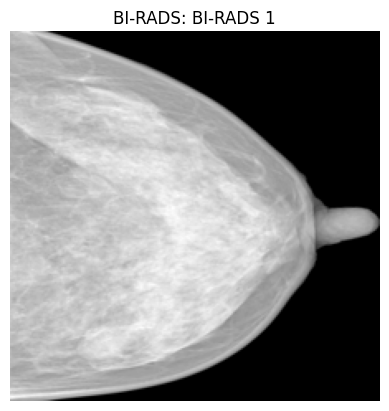

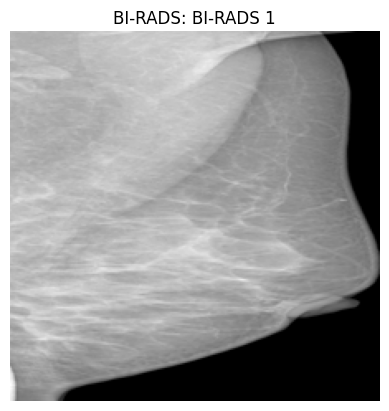

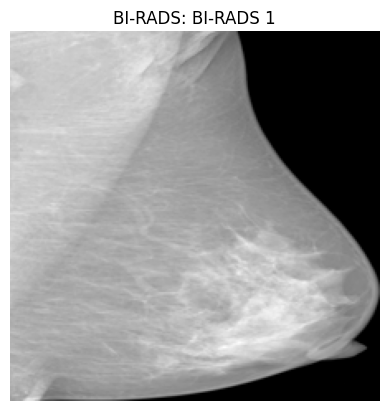

In [ ]:
import matplotlib.pyplot as plt

for path in train_df['preprocessed_path'].head(3):
    img = Image.open(path)
    plt.imshow(img, cmap='gray')
    plt.title(f"BI-RADS: {train_df.loc[train_df['preprocessed_path']==path,'breast_birads'].values[0]}")
    plt.axis('off')
    plt.show()


In [ ]:
for df, name in zip([val_df, test_df], ["Validation", "Test"]):
    print(f"--- Checking {name} Set ---")
    for path in df['preprocessed_path'].head(5):
        print(path, os.path.exists(path))
    print(df['breast_birads'].value_counts())
    print(df["Patient's Age"].describe())
    print(df['breast_density'].value_counts())
    print("\n")


--- Checking Validation Set ---
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/5f32408ad4dcd0d16200071e61cf5817.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2b0018a6a825025bcd559a3ea4a12b1d.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/60062b50681cfd1009aff92a26475954.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/2b217e87073f6ea171ab6d5e2034aae3.png True
/content/drive/MyDrive/VinDr_mammo.png/preprocessed_training_images/88b43181e608d1a2218f4ecdf3e19155.png True
breast_birads
BI-RADS 1    2135
BI-RADS 2     745
BI-RADS 3     158
BI-RADS 4     127
BI-RADS 5      35
Name: count, dtype: int64
count    3200.000000
mean       45.112500
std         9.263695
min        14.000000
25%        40.000000
50%        45.000000
75%        50.000000
max        88.000000
Name: Patient's Age, dtype: float64
breast_density
DENSITY C    2430
DENSITY D     431
DENSITY B     318
DENSITY A      

In [ ]:
test_df.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density', 'split',
       'Series Instance UID', 'Patient's Age', 'View Position',
       'Image Laterality', 'Photometric Interpretation', 'Rows', 'Columns',
       'Imager Pixel Spacing', 'Pixel Spacing', 'Pixel Padding Value',
       'Pixel Padding Range Limit', 'Window Center', 'Window Width',
       'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name', 'Age Group', 'image_path_in_zip',
       'preprocessed_path'],
      dtype='object')

In [ ]:
import torch
torch.cuda.is_available()


True

with saved check point

In [ ]:
# 1️⃣ Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
import numpy as np

In [ ]:
# 2️⃣ Dataset class with correct label type
class MammoDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')  # grayscale → 3 channels
        label = int(self.labels[idx])  # convert to int
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)  # ensure LongTensor for CrossEntropyLoss

# 3️⃣ Image transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [ ]:
# 4️⃣ Load CSVs
train_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/training_split.csv")
val_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/validation_split.csv")

train_dataset = MammoDataset(train_df, transform=transform)
val_dataset   = MammoDataset(val_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# 5️⃣ Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 6️⃣ Training setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 7️⃣ Checkpoint setup
checkpoint_folder = "/content/drive/MyDrive/VinDr_mammo.png/checkpoints/"
os.makedirs(checkpoint_folder, exist_ok=True)
best_model_path = os.path.join(checkpoint_folder, "best_model.pth")
last_epoch_path = os.path.join(checkpoint_folder, "last_epoch.npy")

# --- Resume variables
start_epoch = 0
best_val_loss = np.inf
if os.path.exists(best_model_path):
    print("🔄 Loading previous best model...")
    model.load_state_dict(torch.load(best_model_path))
    if os.path.exists(last_epoch_path):
        start_epoch = int(np.load(last_epoch_path))
        print(f"🔄 Resuming from epoch {start_epoch+1}")


In [ ]:
# --- Training parameters
num_epochs = 15
patience = 3
epochs_no_improve = 0

# --- Training loop with batch-level progress
for epoch in range(start_epoch, num_epochs):
    # --- Training
    model.train()
    running_loss = 0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # --- Print batch progress every 10 batches
        if i % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} | Batch {i+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)

    # --- Validation
    model.eval()
    val_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct / total

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f} - Val Acc: {val_acc:.4f}")

    # --- Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ Best model saved: {best_model_path}")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"⚠️ Early stopping triggered after {epoch+1} epochs.")
            break

    # --- Save last epoch for resuming
    np.save(last_epoch_path, epoch)

print("✅ Training complete. Best model saved.")


Epoch 1/15 | Batch 1/400 | Loss: 0.7363
Epoch 1/15 | Batch 11/400 | Loss: 1.1144
Epoch 1/15 | Batch 21/400 | Loss: 0.9958
Epoch 1/15 | Batch 31/400 | Loss: 0.5965
Epoch 1/15 | Batch 41/400 | Loss: 0.6462
Epoch 1/15 | Batch 51/400 | Loss: 0.9874
Epoch 1/15 | Batch 61/400 | Loss: 0.9526
Epoch 1/15 | Batch 71/400 | Loss: 0.8635
Epoch 1/15 | Batch 81/400 | Loss: 0.8997
Epoch 1/15 | Batch 91/400 | Loss: 1.2566
Epoch 1/15 | Batch 101/400 | Loss: 1.0797
Epoch 1/15 | Batch 111/400 | Loss: 0.9818
Epoch 1/15 | Batch 121/400 | Loss: 0.9702
Epoch 1/15 | Batch 131/400 | Loss: 1.3284
Epoch 1/15 | Batch 141/400 | Loss: 0.5721
Epoch 1/15 | Batch 151/400 | Loss: 0.8417
Epoch 1/15 | Batch 161/400 | Loss: 0.8473
Epoch 1/15 | Batch 171/400 | Loss: 0.9146
Epoch 1/15 | Batch 181/400 | Loss: 1.0605
Epoch 1/15 | Batch 191/400 | Loss: 0.9821
Epoch 1/15 | Batch 201/400 | Loss: 1.1263
Epoch 1/15 | Batch 211/400 | Loss: 0.8974
Epoch 1/15 | Batch 221/400 | Loss: 0.7626
Epoch 1/15 | Batch 231/400 | Loss: 1.1151
Epo

Prepare the test dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# Test dataset class (same as training)
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.labels = pd.Categorical(df['breast_birads']).codes  # if labels exist

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# Transform (same as train/val)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load test CSV
test_df = pd.read_csv("/content/drive/MyDrive/VinDr_mammo.png/test_samples.csv")
test_dataset = MammoTestDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Load your best model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN(num_classes=5).to(device)
best_model_path = "/content/drive/MyDrive/VinDr_mammo.png/checkpoints/best_model.pth"
model.load_state_dict(torch.load(best_model_path))
model.eval()  # Important: set to evaluation mode


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (classifier): Linear(in_features=128, out_features=5, bias=True)
)

Evaluate on test set

In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import numpy as np
import pandas as pd

# --- Ensure model is in evaluation mode
model.eval()

# --- Containers
all_preds = []
all_labels = []

# --- Evaluation loop with progress bar
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Evaluating", unit="batch"):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# --- Compute metrics
acc = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=[f"Class {i}" for i in range(5)], output_dict=True)
conf_mat = confusion_matrix(all_labels, all_preds)

# --- Display results
print(f"\n✅ Test Accuracy: {acc:.4f}\n")

print("📊 Classification Report:")
print(pd.DataFrame(report).transpose())

print("\n🧩 Confusion Matrix:")
print(pd.DataFrame(conf_mat,
                   index=[f"True {i}" for i in range(5)],
                   columns=[f"Pred {i}" for i in range(5)]))


Evaluating: 100%|██████████| 125/125 [43:35<00:00, 20.92s/batch]


✅ Test Accuracy: 0.6705

📊 Classification Report:
              precision  recall  f1-score    support
Class 0         0.67050  1.0000  0.802754  2682.0000
Class 1         0.00000  0.0000  0.000000   934.0000
Class 2         0.00000  0.0000  0.000000   186.0000
Class 3         0.00000  0.0000  0.000000   152.0000
Class 4         0.00000  0.0000  0.000000    46.0000
accuracy        0.67050  0.6705  0.670500     0.6705
macro avg       0.13410  0.2000  0.160551  4000.0000
weighted avg    0.44957  0.6705  0.538246  4000.0000

🧩 Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4
True 0    2682       0       0       0       0
True 1     934       0       0       0       0
True 2     186       0       0       0       0
True 3     152       0       0       0       0
True 4      46       0       0       0       0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pd.DataFrame(report).transpose().to_csv("/content/drive/MyDrive/VinDr_mammo.png/test_metrics_generalperformance.csv")
np.savetxt("/content/drive/MyDrive/VinDr_mammo.png/confusion_matrix_generalperformance.csv", conf_mat, delimiter=",")


MODIFY ABOVE

In [ ]:
from tqdm import tqdm

def evaluate_by_group(model, df, subgroup_col, transform, batch_size=32):
    results = {}
    unique_groups = df[subgroup_col].dropna().unique()

    for group in tqdm(unique_groups, desc=f"Evaluating {subgroup_col}"):
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_preds, all_labels = [], []
        model.eval()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        results[group] = round(acc, 4)

    return results


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

# ✅ Dataset for evaluation
class MammoTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        # Convert labels to integers
        self.labels = pd.Categorical(df['breast_birads']).codes

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'preprocessed_path']
        img = Image.open(img_path).convert('L').convert('RGB')
        label = int(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.long)

# ✅ Function to evaluate by subgroup
def evaluate_by_group(model, df, subgroup_col, transform, batch_size=32):
    results = {}
    unique_groups = df[subgroup_col].dropna().unique()

    for group in unique_groups:
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_preds = []
        all_labels = []
        model.eval()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        results[group] = acc

    return results

# --- Evaluate on Age Group
age_group_acc = evaluate_by_group(model, test_df, 'Age Group', transform)
print("✅ Accuracy by Age Group:")
for group, acc in age_group_acc.items():
    print(f"{group}: {acc:.4f}")

# --- Evaluate on Breast Density
density_acc = evaluate_by_group(model, test_df, 'breast_density', transform)
print("\n✅ Accuracy by Breast Density:")
for density, acc in density_acc.items():
    print(f"{density}: {acc:.4f}")

✅ Accuracy by Age Group:
50-59: 0.6709
30-39: 0.6912
40-49: 0.6778
60-69: 0.6017
20-29: 0.6912
70-79: 0.3214
<20: 1.0000

✅ Accuracy by Breast Density:
DENSITY B: 0.6421
DENSITY C: 0.6660
DENSITY D: 0.7037
DENSITY A: 1.0000


Overall Accuracy ≈ 67%

The model predicts almost everything as Class 0.

Class 0 happens to be the majority of the dataset (~2,682 out of 4,000 images).

So even if the model completely misses Classes 1–4, it still gets ~67% “correct” just by guessing the majority class.

✅ This inflates the overall accuracy.

2️⃣ Subgroup Accuracy Looks High

When you check by Age Group or Breast Density, you’re also mostly measuring accuracy for the dominant Class 0 images in that subgroup.

Subgroups with very few samples (like <20 years old or density A) can show 1.0 because the model guessed Class 0 correctly by chance.

So “good performance” in the table does NOT mean it detects all classes well — it mostly means it guesses the majority class correctly.



Notice: No images of Classes 1–4 were predicted correctly.

This is why precision, recall, F1 = 0 for minority classes.

✅ Key Insight

Accuracy alone is misleading in imbalanced datasets.

Metrics like per-class recall, F1-score, or balanced accuracy are much more informative.

Your model is not truly performing well for minor groups or rare classes — it just looks good because the majority class dominates.

In [ ]:
import torch
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score

def bias_matrix(model, df, subgroup_col, transform, num_classes=5, batch_size=32, device='cuda'):
    """
    Returns a matrix: rows=subgroups, columns=classes (recall per class)
    """
    unique_groups = df[subgroup_col].dropna().unique()
    results = pd.DataFrame(index=unique_groups, columns=[f"Class {i}" for i in range(num_classes)])

    for group in unique_groups:
        sub_df = df[df[subgroup_col] == group].reset_index(drop=True)
        if len(sub_df) == 0:
            continue

        dataset = MammoTestDataset(sub_df, transform=transform)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        all_preds, all_labels = [], []
        model.eval()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute per-class recall
        recalls = recall_score(all_labels, all_preds, labels=list(range(num_classes)), average=None, zero_division=0)
        results.loc[group] = recalls.round(4)

    return results

# --- Example usage ---
age_bias_matrix = bias_matrix(model, test_df, 'Age Group', transform, num_classes=5, device=device)
print("✅ Bias / Fairness Matrix by Age Group:")
print(age_bias_matrix)

density_bias_matrix = bias_matrix(model, test_df, 'breast_density', transform, num_classes=5, device=device)
print("\n✅ Bias / Fairness Matrix by Breast Density:")
print(density_bias_matrix)

# Optional: save to CSV
age_bias_matrix.to_csv("/content/drive/MyDrive/VinDr_mammo.png/bias_matrix_age.csv")
density_bias_matrix.to_csv("/content/drive/MyDrive/VinDr_mammo.png/bias_matrix_density.csv")


✅ Bias / Fairness Matrix by Age Group:
      Class 0 Class 1 Class 2 Class 3 Class 4
50-59     1.0     0.0     0.0     0.0     0.0
30-39     1.0     0.0     0.0     0.0     0.0
40-49     1.0     0.0     0.0     0.0     0.0
60-69     1.0     0.0     0.0     0.0     0.0
20-29     1.0     0.0     0.0     0.0     0.0
70-79     1.0     0.0     0.0     0.0     0.0
<20       1.0     0.0     0.0     0.0     0.0

✅ Bias / Fairness Matrix by Breast Density:
          Class 0 Class 1 Class 2 Class 3 Class 4
DENSITY B     1.0     0.0     0.0     0.0     0.0
DENSITY C     1.0     0.0     0.0     0.0     0.0
DENSITY D     1.0     0.0     0.0     0.0     0.0
DENSITY A     1.0     0.0     0.0     0.0     0.0
